In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("/home/ilya/Documents/stress-level-by-PPG/ppg_feature.csv")
data.head()

,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_pNN50,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN,HRV_HF,stress_index
0,1077.205882,97.338638,157.223530,162.379763,0.090362,0.145955,1093.7500,69.496875,64.705882,70.588235,843.75,1265.625,4.25,296.875,0.097055,9.0
1,1072.048611,97.229972,111.841927,115.280127,0.090695,0.104325,1070.3125,104.245312,66.666667,83.333333,843.75,1250.000,4.50,296.875,0.029106,9.0
2,1040.798611,116.204689,144.453601,148.896350,0.111650,0.138791,1054.6875,115.828125,66.666667,88.888889,781.25,1250.000,6.00,296.875,0.036454,9.0
3,1010.416667,140.369457,212.117140,218.626869,0.138922,0.209930,1015.6250,115.828125,77.777778,88.888889,781.25,1359.375,6.00,156.250,0.108589,9.0
4,1025.173611,135.913610,181.704236,187.274873,0.132576,0.177242,1007.8125,150.576562,66.666667,83.333333,781.25,1359.375,9.00,156.250,0.096434,9.0


In [5]:
rows_to_delete = data[data.isna().any(axis=1)]
data = data.dropna()
data.to_csv('./ppg_feature.csv', index=False)
rows_to_delete

,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_pNN50,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN,HRV_HF,stress_index


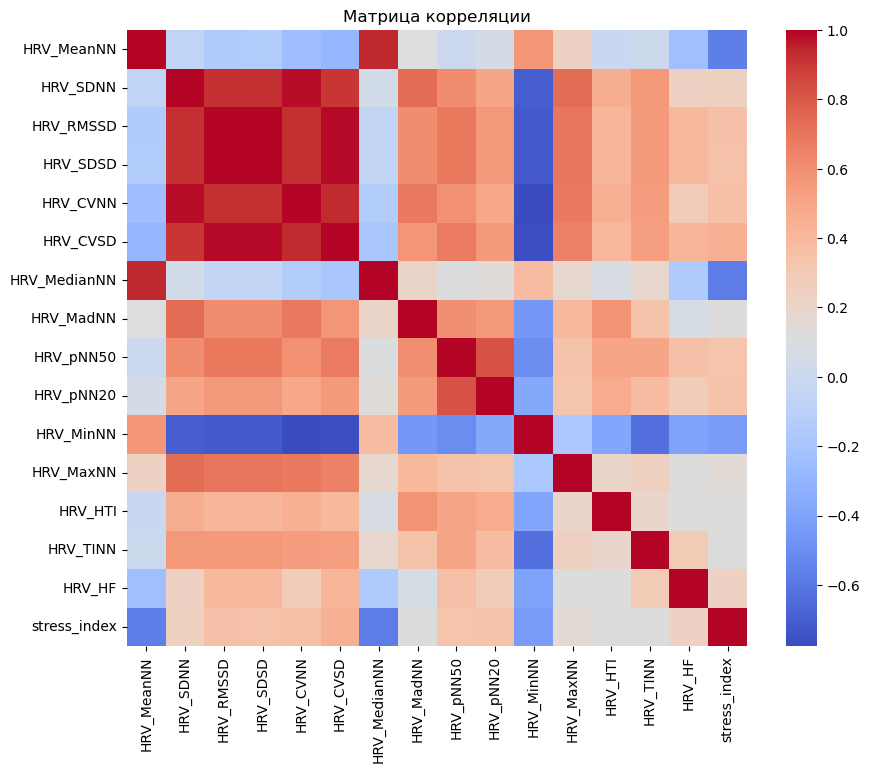

In [6]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

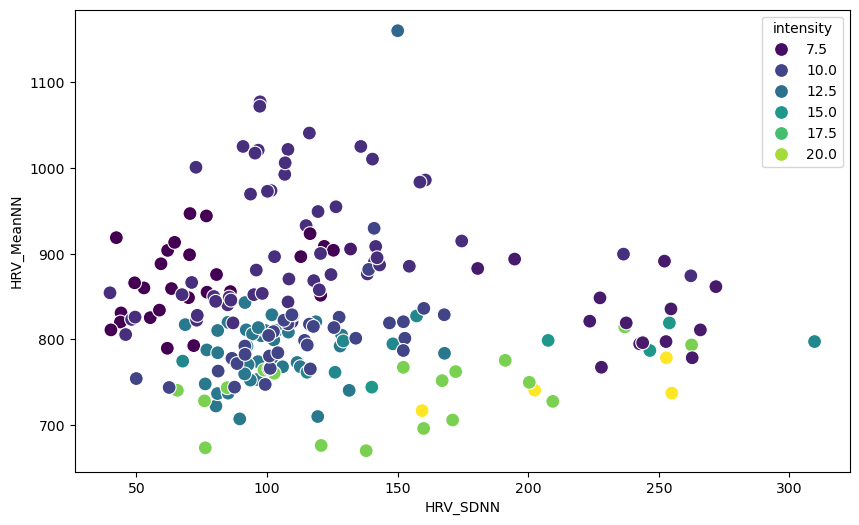

In [10]:
mini_data = data[['HRV_SDNN', 'HRV_MeanNN', 'stress_index']]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=mini_data, x='HRV_SDNN', y='HRV_MeanNN', hue='stress_index', palette='viridis', s=100)
plt.title('')
plt.xlabel('HRV_SDNN')
plt.ylabel('HRV_MeanNN')
plt.legend(title='intensity')
# plt.savefig(f'/home/ilya/Documents/stress-level-by-PPG/corr2_HRV_MeanNN_HRV_SDNN.png', dpi=300, bbox_inches='tight')
plt.show()